In [1]:
cd c:\Users\seand\OneDrive\Dokumente\Masterthesis\CL_PDE_Solv

c:\Users\seand\OneDrive\Dokumente\Masterthesis\CL_PDE_Solv


In [2]:
from Problems.oneDim_Problems.tsintproblem import clustering, f, exact_sol, clustering_grid
from models_code.SubproblemNetworks.LocalDeepONet_oneDim import LocalDeepONet_oneDim
from models_code.lossfunc import *
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

from src.config import *

# Plots of Problem defining functions

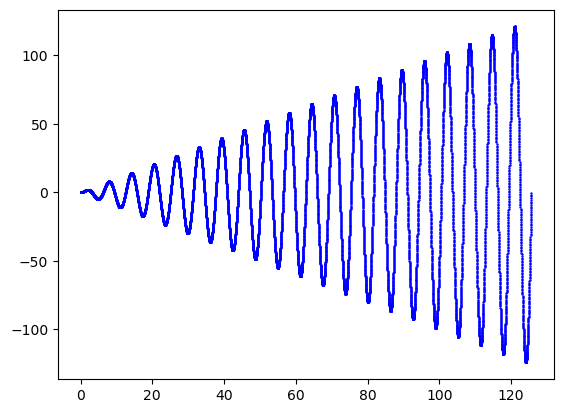

In [14]:
#plot f in [0,20 pi]
grid_x = torch.arange(0,40* np.pi,0.01)
out_f = np.array([f(t).numpy() for t in grid_x])

plt.scatter(grid_x.numpy() , out_f, color = 'blue', s = 0.5)


plt.show()

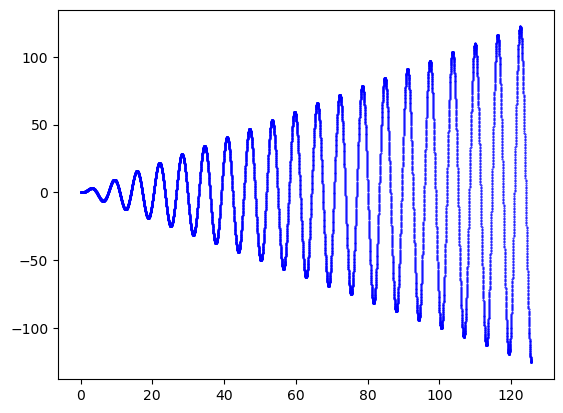

In [15]:
#plot exact solution in [0,40 pi]
grid_x = torch.arange(0,40* np.pi,0.01)
out_exact_sol = np.array([exact_sol(t).numpy() for t in grid_x])

plt.scatter(grid_x.numpy() , out_exact_sol, color = 'blue', s = 0.2)
plt.show()

# Training Loops Local Solutions

In [ ]:
#load local model
sol_cluster_A = torch.load(Path(trained_models_address_tsint , 'local.pt'))
sol_cluster_A.eval()

In [21]:
num_train_boundary = 2
t_grid = torch.linspace(0.,2*torch.pi,4000,requires_grad = True).view(-1,1).to('cuda')
boundary_t = torch.tensor(0., requires_grad = True).view(-1,1).to('cuda')
boundary_values = torch.linspace(-1.5,1.5,num_train_boundary, requires_grad = True).to('cuda')
#output on grid:
f_out = torch.zeros(t_grid.shape[0]).to('cuda')
for i in range(t_grid.shape[0]):
  f_out[i] = f(t_grid[i])

#model:

#sol_local = LocalDeepONet_oneDim(1, 30, 20)
sol_local = sol_local.to('cuda')
alpha = 1e-2
beta = 0#1e-2
optimizer = torch.optim.Adam(sol_local.parameters(), lr = 1e-3)


for i in range(2000):
  optimizer.zero_grad()
  boundary_value_epoch = torch.full( t_grid.shape , boundary_values[i%num_train_boundary].item() , requires_grad = True).to('cuda')

  loss = D_loc(sol_local , boundary_t, boundary_value_epoch  , t_grid, f_out , alpha, beta )

  print(loss.item())
  loss.backward(retain_graph=True)
  optimizer.step()



0.010006842203438282
0.013384184800088406
0.019051214680075645
0.023948291316628456
0.016125230118632317
0.013092792592942715
0.016192078590393066
0.013046587817370892
0.014102797955274582
0.013356924057006836
0.011522162705659866
0.01346956379711628
0.012383002787828445
0.010888496413826942
0.011427625082433224
0.012529384344816208
0.012383773922920227
0.011421242728829384
0.010864827781915665
0.010809550061821938
0.010834754444658756
0.010884116403758526
0.010937556624412537
0.010511970147490501
0.010275065898895264
0.010794466361403465
0.010657000355422497
0.010090652853250504
0.010265586897730827
0.010619882494211197
0.010461738333106041
0.010211009532213211
0.010189473628997803
0.010209945961833
0.010273435153067112
0.010285221971571445
0.010101234540343285
0.010102024301886559
0.010251118801534176
0.010133834555745125
0.010044350288808346


KeyboardInterrupt: 

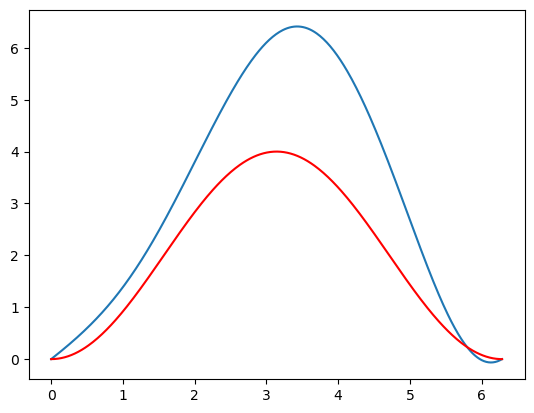

In [22]:
t_grid_A_test = torch.linspace(0.,2*torch.pi,400).view(-1,1)
sol_local.to('cpu')
boundary_test = 0.0
sol = sol_local(t_grid_A_test,torch.full( t_grid_A_test.shape , boundary_test) )
plt.plot(t_grid_A_test.detach().numpy() , sol.detach().numpy())
plt.plot(t_grid_A_test, -2* np.cos(t_grid_A_test) + boundary_test+2, color = 'red')
plt.show()